#Strassen matrix multiplication

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
from scipy.optimize import curve_fit
import networkx as nx
import math

In [2]:
def matmult(X, Y):
  result = np.zeros((len(a), len(a)))

# iterate through rows of X
  for i in range(len(X)):
   # iterate through columns of Y
    for j in range(len(Y[0])):
       # iterate through rows of Y
        for k in range(len(Y)):
            result[i][j] += X[i][k] * Y[k][j]
  return np.matrix(result)

In [3]:
num_addorsub=0
num_mul=0
num_assign=0

def read_matrix(file_path):
    input_matrix = list()
    with open(file_path, 'r') as f:
        txt = f.read()
        for line in txt.split('\n'):
            input_matrix.extend(line.split())
    matrix = [list() for i in range(0, 6)]
    for i in range(0, 6):
        for j in range(0, 6):
            matrix[i].append(float(input_matrix[i * 6 + j]))
    return matrix

def matrix_add(matrix_a, matrix_b):
    '''
    :param matrix_a:
    :param matrix_b:
    :return:matrix_c=matrix_a+matrix_b
    '''
    rows = len(matrix_a) # get numbers of rows
    columns = len(matrix_a[0]) # get numbers of cols
    matrix_c = [list() for i in range(rows)] # build matrix 2d list
    for i in range(rows):
        for j in range(columns):
            matrix_c_temp = matrix_a[i][j] + matrix_b[i][j]
            global num_addorsub,num_assign
            num_addorsub=num_addorsub+1
            num_assign = num_assign+1
            matrix_c[i].append(matrix_c_temp)
    return matrix_c


def matrix_minus(matrix_a, matrix_b):
    '''
    :param matrix_a:
    :param matrix_b:
    :return:matrix_c=matrix_a-matrix_b
    '''
    rows = len(matrix_a)
    columns = len(matrix_a[0])
    matrix_c = [list() for i in range(rows)]
    for i in range(rows):
        for j in range(columns):
            matrix_c_temp = matrix_a[i][j] - matrix_b[i][j]
            global num_addorsub,num_assign
            num_addorsub = num_addorsub + 1
            num_assign=num_assign+1
            matrix_c[i].append(matrix_c_temp)
    return matrix_c


def matrix_divide(matrix_a, row, column):
    '''
    :param matrix_a:
    :param row:
    :param column:
    :return: matrix_b=matrix_a(row,column) to divide matrix_a
    '''
    length = len(matrix_a)
    matrix_b = [list() for i in range(length // 2)]
    k = 0
    for i in range((row - 1) * length // 2, row * length // 2):
        for j in range((column - 1) * length // 2, column * length // 2):
            matrix_c_temp = matrix_a[i][j]
            matrix_b[k].append(matrix_c_temp)
        k += 1
    return matrix_b


def matrix_merge(matrix_11, matrix_12, matrix_21, matrix_22):
    '''
    :param matrix_11:
    :param matrix_12:
    :param matrix_21:
    :param matrix_22:
    :return:mariix merged by 4 parts above
    '''
    length = len(matrix_11)
    matrix_all = [list() for i in range(length * 2)]  # build a matrix of double rows
    for i in range(length):
        # for each row. matrix_all list contain row of matrix_11 and matrix_12
        matrix_all[i] = matrix_11[i] + matrix_12[i]
    for j in range(length):
        # for each row. matrix_all list contain row of matrix_21 and matrix_22
        matrix_all[length + j] = matrix_21[j] + matrix_22[j]
    return matrix_all


def strassen(matrix_a, matrix_b):
    '''
    :param matrix_a:
    :param matrix_b:
    :return:matrix_a * matrix_b
    '''
    rows = len(matrix_a)
    if rows == 1:
        matrix_all = [list() for i in range(rows)]
        matrix_all[0].append(matrix_a[0][0] * matrix_b[0][0])
    elif(rows % 2 ==1):
        matrix_a_np = np.array(matrix_a)
        matrix_b_np = np.array(matrix_b)
        matrix_all = np.matrix(matmult(matrix_a_np,matrix_b_np))
        global num_mul,num_addorsub
        num_mul = num_mul + 27
        num_addorsub=num_addorsub + 18
    else:
        # 10 first parts of computing
        s1 = matrix_minus((matrix_divide(matrix_b, 1, 2)), (matrix_divide(matrix_b, 2, 2)))
        s2 = matrix_add((matrix_divide(matrix_a, 1, 1)), (matrix_divide(matrix_a, 1, 2)))
        s3 = matrix_add((matrix_divide(matrix_a, 2, 1)), (matrix_divide(matrix_a, 2, 2)))
        s4 = matrix_minus((matrix_divide(matrix_b, 2, 1)), (matrix_divide(matrix_b, 1, 1)))
        s5 = matrix_add((matrix_divide(matrix_a, 1, 1)), (matrix_divide(matrix_a, 2, 2)))
        s6 = matrix_add((matrix_divide(matrix_b, 1, 1)), (matrix_divide(matrix_b, 2, 2)))
        s7 = matrix_minus((matrix_divide(matrix_a, 1, 2)), (matrix_divide(matrix_a, 2, 2)))
        s8 = matrix_add((matrix_divide(matrix_b, 2, 1)), (matrix_divide(matrix_b, 2, 2)))
        s9 = matrix_minus((matrix_divide(matrix_a, 1, 1)), (matrix_divide(matrix_a, 2, 1)))
        s10 = matrix_add((matrix_divide(matrix_b, 1, 1)), (matrix_divide(matrix_b, 1, 2)))
        # 7 second parts of computing
        p1 = strassen(matrix_divide(matrix_a, 1, 1), s1)
        p2 = strassen(s2, matrix_divide(matrix_b, 2, 2))
        p3 = strassen(s3, matrix_divide(matrix_b, 1, 1))
        p4 = strassen(matrix_divide(matrix_a, 2, 2), s4)
        p5 = strassen(s5, s6)
        p6 = strassen(s7, s8)
        p7 = strassen(s9, s10)
        # 4 final parts of result
        c11 = matrix_add(matrix_add(p5, p4), matrix_minus(p6, p2))
        c12 = matrix_add(p1, p2)
        c21 = matrix_add(p3, p4)
        c22 = matrix_minus(matrix_add(p5, p1), matrix_add(p3, p7))
        matrix_all = matrix_merge(c11, c12, c21, c22)
        global num_assign
        num_assign =num_assign+22
    return matrix_all


 71%|█████████████████████████████████████████████████████████                       | 107/150 [02:02<01:28,  2.07s/it]


 40%|████████████████████████████████▍                                                | 60/150 [00:11<00:35,  2.55it/s]


 84%|███████████████████████████████████████████████████████████████████▏            | 126/150 [02:59<01:06,  2.75s/it]


 55%|████████████████████████████████████████████▊                                    | 83/150 [00:33<01:33,  1.40s/it]


 99%|███████████████████████████████████████████████████████████████████████████████▍| 149/150 [04:48<00:04,  4.98s/it]


 83%|██████████████████████████████████████████████████████████████████▋             | 125/150 [01:32<01:13,  2.94s/it]


 68%|██████████████████████████████████████████████████████▍                         | 102/150 [00:40<01:10,  1.47s/it]


 52%|██████████████████████████████████████████                                       | 78/150 [00:13<00:40,  1.77it/s]


 96%|████████████████████████████████████████████████████████████████████████████▊   | 144/150 [02:38<00:24,  4.14s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:25<00:00, 188.57s/it]


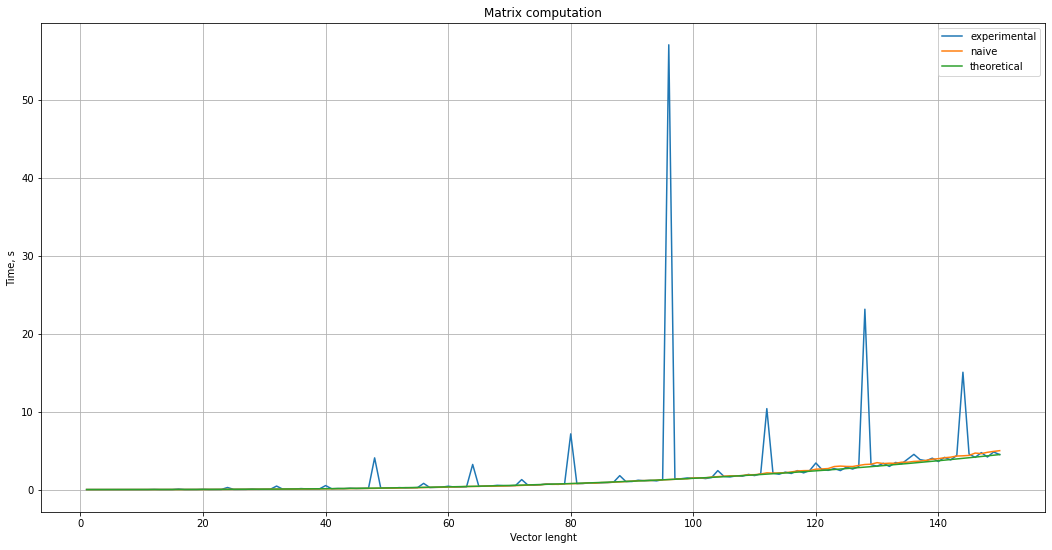

In [ ]:

sum_y = np.zeros(150)
sum_y_naive = np.zeros(150)
n = np.arange(1, 151)

for i in tqdm.tqdm(range(3)):
  y_exp = []
  for el in tqdm.tqdm(n):
    start_time = time.time()
    a = np.random.randint(low=1, high=10, size=(el, el))
    b = np.random.randint(low=1, high=10, size=(el, el))
    strassen(a, b)
    #np.matmul(a, b)
    y_exp.append(time.time() - start_time)
  sum_y += np.array(y_exp)
y_exp_mean = sum_y / 3

for i in tqdm.tqdm(range(3)):
  y_exp_naive = []
  for el in tqdm.tqdm(n):
    start_time = time.time()
    a = np.random.randint(low=1, high=10, size=(el, el))
    b = np.random.randint(low=1, high=10, size=(el, el))
    matmult(a, b)
    y_exp_naive.append(time.time() - start_time)
  sum_y_naive += np.array(y_exp_naive)
y_exp_mean_naive = sum_y_naive / 3

plt.figure(figsize=(18,9))
plt.plot(n, y_exp_mean, label='experimental')
plt.plot(n, y_exp_mean_naive, label='naive')
plt.plot(n, y_exp_mean[-1]/(math.pow(n[-1], 2.807))*np.power(n, 2.807) + y_exp_mean[1]/2, label='theoretical')
plt.title('Matrix computation')
plt.ylabel('Time, s')
plt.xlabel('Vector lenght')
plt.legend()
plt.grid(True)
plt.show()

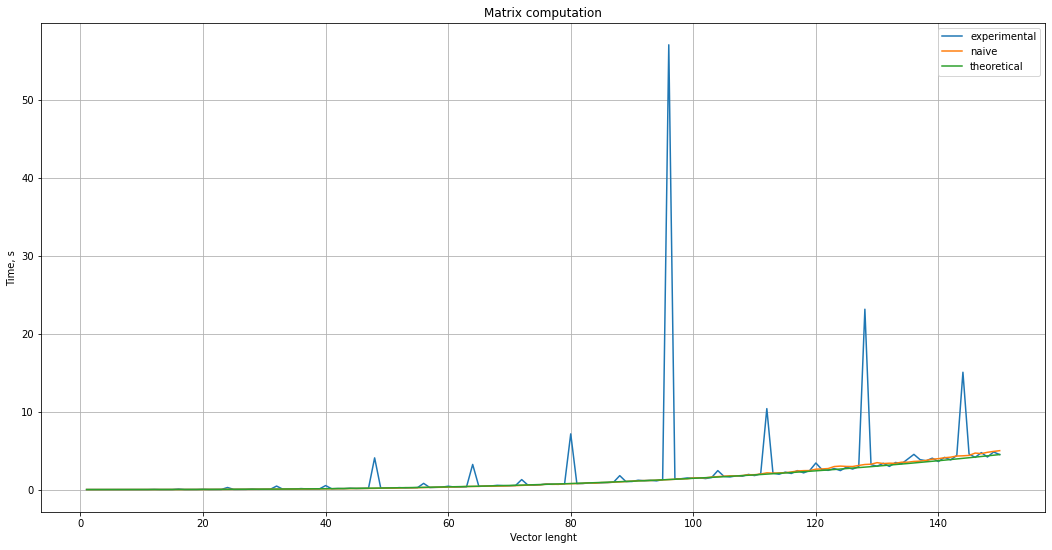

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(n, y_exp_mean, label='experimental')
plt.plot(n, y_exp_mean_naive, label='naive')
plt.plot(n, y_exp_mean[-1]/(math.pow(n[-1], 2.807))*np.power(n, 2.807) + y_exp_mean[1]/2, label='theoretical')
plt.title('Matrix computation')
plt.ylabel('Time, s')
plt.xlabel('Vector lenght')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
el = 700
a = np.random.randint(low=1, high=10, size=(el, el))
b = np.random.randint(low=1, high=10, size=(el, el))
start_time = time.time()
strassen(a, b)
time1 = time.time() - start_time

time1

In [ ]:
el = 700
a = np.random.randint(low=1, high=10, size=(el, el))
b = np.random.randint(low=1, high=10, size=(el, el))
start_time = time.time()
matmult(a, b)
time2 = time.time() - start_time

time2

#Floyd-Warshall all-pairs shortest path search

In [26]:
def cubic(x, a):
    return a*x**3
    

def measure_time(runs, experiments):
    times = []
    edges_multiplier = 5
    for i in range(runs):
        times.append([])
        for j in tqdm(range(1, experiments + 1)):
            nodes = j
            m = edges_multiplier * j

            g = nx.gnm_random_graph(nodes, m)
            weights = np.random.randint(j, size=m)
            for k, elem in enumerate(g.edges()):
                g[elem[0]][elem[1]]['weight'] = weights[k]
                g[elem[1]][elem[0]]['weight'] = weights[k]
            start_time = time.time()
            nx.algorithms.shortest_paths.dense.floyd_warshall(g, 'weight')
            times[i].append(time.time() - start_time)

    return np.array(times, dtype=np.float64).mean(axis=0)

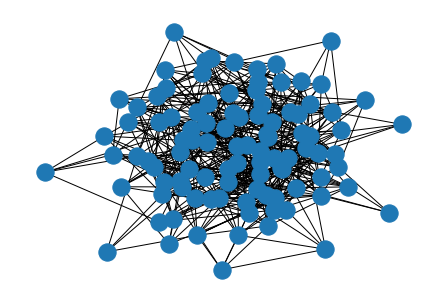

In [10]:
n = 100
m = 500

g = nx.gnm_random_graph(n, m)
weights = np.random.randint(100, size=m)

weights_matrix = np.zeros((m, m))

for i, elem in enumerate(g.edges()):
    g[elem[0]][elem[1]]['weight'] = weights[i]
    g[elem[1]][elem[0]]['weight'] = weights[i]

nx.draw(g)

In [12]:
%%time
paths = nx.algorithms.shortest_paths.dense.floyd_warshall(g, 'weight')
print(paths[42][69])

27
CPU times: user 584 ms, sys: 1.84 ms, total: 586 ms
Wall time: 592 ms


In [31]:
avg_time_fw = measure_time(3, 200)


100%|██████████| 200/200 [03:33<00:00,  1.07s/it]


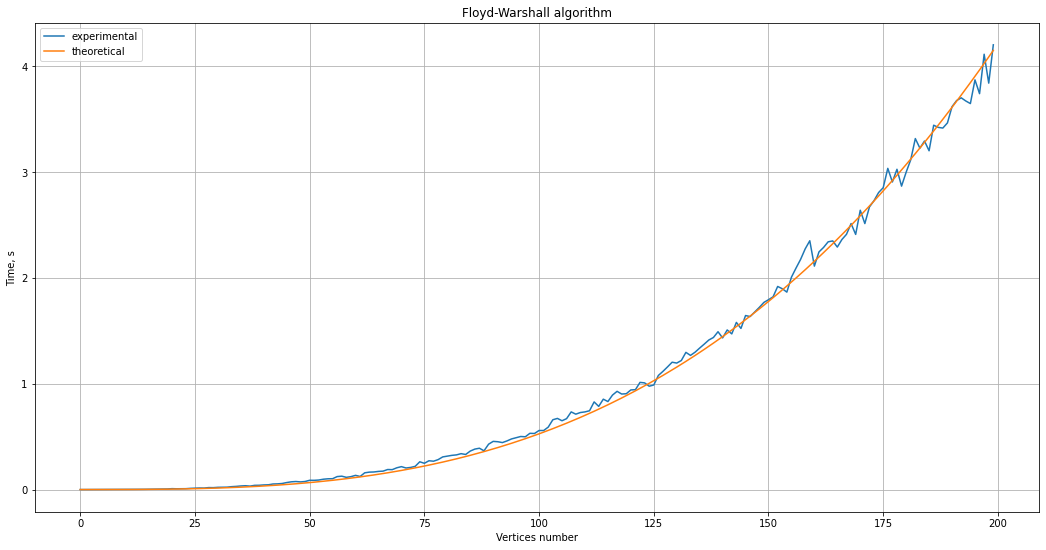

In [43]:
n = np.arange(200)
popt, _ = curve_fit(cubic, n, avg_time_fw)
plt.figure(figsize=(18,9))
plt.plot(n, avg_time_fw, label='experimental')
plt.plot(n, cubic(n, *popt), label='theoretical')
plt.title('Floyd-Warshall algorithm')
plt.ylabel('Time, s')
plt.xlabel('Vertices number')
plt.legend()
plt.grid(True)
plt.show()